In [ ]:
!pip uninstall tensorflow tensorflow-addons -y


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow==2.16.1

  Using cached tensorflow-2.16.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.3 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.9/589.9 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 64.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 71.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 81.3 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.19.0
    Uninstalling 

In [ ]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/NER/crime_01.csv", encoding="latin1")

data.head(26)

,Sentence number,Word,Tag
0,1,On,O
1,1,June,B-TI
2,1,2,M-TI
3,1,2024,E-TI
4,1,Laura,B-VI
5,1,Green,E-VI
6,1,was,O
7,1,found,O
8,1,murder,S-TY
9,1,in,O


In [ ]:
print("Unique words in corpus:", data['Word'].nunique())
print("Unique tags in corpus:", data['Tag'].nunique())

Unique words in corpus: 1002
Unique tags in corpus: 12


In [ ]:
words = list(set(data["Word"].values))
words

['Eva',
 'Wells',
 'gas',
 'Bridges',
 'Ashley',
 'Springfield',
 'mall',
 'Spence',
 'Parks',
 'camp',
 'Chewacla',
 'Emilia',
 'Rachel',
 'Clarke',
 'cinema',
 '2',
 'Plano',
 'living',
 'located',
 'grocery',
 'resident',
 'abandoned',
 'Cincinnati',
 'phone',
 'Bluff',
 '2023',
 'Gianna',
 'Central',
 'carjacking',
 'Walker',
 'report',
 'work',
 'Florence',
 'Gage',
 'Torres',
 'Fry',
 'Fleming',
 'New',
 'Briggs',
 'Charles',
 'mother',
 'Stewart',
 '20th',
 'Beach',
 'Mays',
 '12',
 'Skinner',
 'her',
 'Dorsey',
 'Greer',
 'Roberts',
 'Rouge',
 '4',
 'Bella',
 'parking',
 'Shreveport',
 'high',
 'Ali',
 'downtown',
 'Boston',
 'for',
 'Layla',
 'of',
 'return',
 'Grant',
 'crime',
 'Brent',
 'Elk',
 'Gray',
 'Bend',
 'campus',
 'teenager',
 'University',
 'Edwards',
 'emily',
 'daycare',
 'Portland',
 'Orleans',
 'Dyer',
 'diner',
 'Eaton',
 'James',
 'Collins',
 'Amarillo',
 'Stokes',
 'city',
 'stairwell',
 'lakeside',
 'Nathan',
 'bank',
 'Huff',
 'school',
 'Kevin',
 'Hood',

In [ ]:
data['Tag'].unique()

array(['O', 'B-TI', 'M-TI', 'E-TI', 'B-VI', 'E-VI', 'S-TY', 'B-LO',
       'E-LO', 'M-LO', 'M-VI', 'S-LO'], dtype=object)

In [ ]:
words = list(set(data["Word"].values))
words.append("ENDPAD")
num_words = len(words)
num_words

1003

In [ ]:
tags = data['Tag'].unique().tolist()
num_tags = len(tags)

In [ ]:
class SentenceGetter(object):
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, t) for w, t in zip(s["Word"].values.tolist(),
                                                           s['Tag'].values.tolist())]
        self.grouped = self.data.groupby("Sentence number").apply(agg_func)
        self.sentences = [s for s in self.grouped]

    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [ ]:
getter = SentenceGetter(data)
sentences = getter.sentences

/tmp/ipython-input-1777737471.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  self.grouped = self.data.groupby("Sentence number").apply(agg_func)


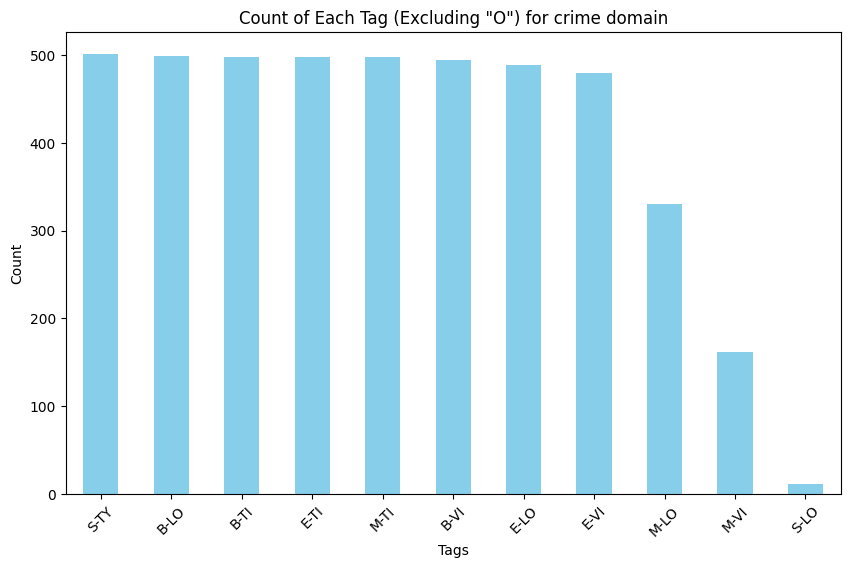

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
tag_to_ignore = 'O'
#Filter out the specific tag
filtered_df = data[data['Tag'] != tag_to_ignore]
# Count the occurrences of each tag
tag_counts = filtered_df['Tag'].value_counts()
# Create the bar chart
plt.figure(figsize=(10, 6))
tag_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Each Tag (Excluding "{}") for crime domain'.format(tag_to_ignore))
plt.xlabel('Tags')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
sentences[0]

[('On', 'O'),
 ('June', 'B-TI'),
 ('2', 'M-TI'),
 ('2024', 'E-TI'),
 ('Laura', 'B-VI'),
 ('Green', 'E-VI'),
 ('was', 'O'),
 ('found', 'O'),
 ('murder', 'S-TY'),
 ('in', 'O'),
 ('her', 'O'),
 ('home', 'B-LO'),
 ('The', 'O'),
 ('police', 'O'),
 ('suspect', 'O'),
 ('foul', 'O'),
 ('play', 'O')]

In [ ]:
word2idx = {w: i + 1 for i, w in enumerate(words)}
tag2idx = {t: i for i, t in enumerate(tags)}

In [ ]:
word2idx

{'Eva': 1,
 'Wells': 2,
 'gas': 3,
 'Bridges': 4,
 'Ashley': 5,
 'Springfield': 6,
 'mall': 7,
 'Spence': 8,
 'Parks': 9,
 'camp': 10,
 'Chewacla': 11,
 'Emilia': 12,
 'Rachel': 13,
 'Clarke': 14,
 'cinema': 15,
 '2': 16,
 'Plano': 17,
 'living': 18,
 'located': 19,
 'grocery': 20,
 'resident': 21,
 'abandoned': 22,
 'Cincinnati': 23,
 'phone': 24,
 'Bluff': 25,
 '2023': 26,
 'Gianna': 27,
 'Central': 28,
 'carjacking': 29,
 'Walker': 30,
 'report': 31,
 'work': 32,
 'Florence': 33,
 'Gage': 34,
 'Torres': 35,
 'Fry': 36,
 'Fleming': 37,
 'New': 38,
 'Briggs': 39,
 'Charles': 40,
 'mother': 41,
 'Stewart': 42,
 '20th': 43,
 'Beach': 44,
 'Mays': 45,
 '12': 46,
 'Skinner': 47,
 'her': 48,
 'Dorsey': 49,
 'Greer': 50,
 'Roberts': 51,
 'Rouge': 52,
 '4': 53,
 'Bella': 54,
 'parking': 55,
 'Shreveport': 56,
 'high': 57,
 'Ali': 58,
 'downtown': 59,
 'Boston': 60,
 'for': 61,
 'Layla': 62,
 'of': 63,
 'return': 64,
 'Grant': 65,
 'crime': 66,
 'Brent': 67,
 'Elk': 68,
 'Gray': 69,
 'Bend': 

In [ ]:
tag2idx

{'O': 0,
 'B-TI': 1,
 'M-TI': 2,
 'E-TI': 3,
 'B-VI': 4,
 'E-VI': 5,
 'S-TY': 6,
 'B-LO': 7,
 'E-LO': 8,
 'M-LO': 9,
 'M-VI': 10,
 'S-LO': 11}

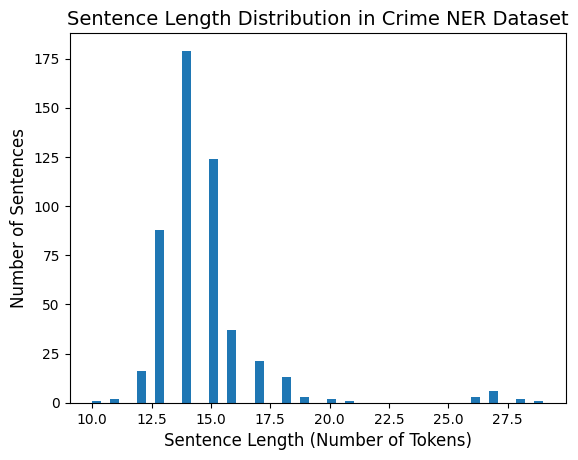

In [ ]:
plt.hist([len(s) for s in sentences], bins=50)
# Add title and axis labels
plt.title("Sentence Length Distribution in Crime NER Dataset", fontsize=14)
plt.xlabel("Sentence Length (Number of Tokens)", fontsize=12)
plt.ylabel("Number of Sentences", fontsize=12)
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 40

X = [[word2idx[w[0]] for w in s] for s in sentences]
X = pad_sequences(maxlen=max_len, sequences=X, padding="post", value=num_words-1)

y = [[tag2idx[w[1]] for w in s] for s in sentences]
y = pad_sequences(maxlen=max_len, sequences=y, padding="post", value=tag2idx["O"])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:

!pip install git+https://www.github.com/keras-team/keras-contrib.git

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-l4xofdq0
  Running command git clone --filter=blob:none --quiet https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-l4xofdq0
  Resolved https://www.github.com/keras-team/keras-contrib.git to commit 3fc5ef709e061416f4bc8a92ca3750c824b5d2b0
  Preparing metadata (setup.py) ... done
  Created wheel for keras_contrib: filename=keras_contrib-2.0.8-py3-none-any.whl size=101058 sha256=f7c68fefa5970608c039c8872c4696b7bb5e89c2d820ffc3f0e606dd1ba47b8e
  Stored in directory: /tmp/pip-ephem-wheel-cache-q6wb8rql/wheels/67/41/69/d81aeb0ed2b4753c3083b61cbce1660777edc47dab0229e53a
Successfully built keras_contrib


In [ ]:
!pip install livelossplot

In [ ]:
tfa.text.crf_log_likelihood

NameError: name 'tfa' is not defined

In [ ]:
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)


NameError: name 'tf' is not defined

In [ ]:
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, TimeDistributed, Dense, SpatialDropout1D

from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 40

X = [[word2idx[w[0]] for w in s] for s in sentences]
X = pad_sequences(maxlen=max_len, sequences=X, padding="post", value=num_words-1)

y = [[tag2idx[w[1]] for w in s] for s in sentences]
y = pad_sequences(maxlen=max_len, sequences=y, padding="post", value=tag2idx["O"])

input_word = Input(shape=(max_len,), dtype=tf.int32)

x = Embedding(num_words, 64)(input_word)
x = SpatialDropout1D(0.1)(x)
x = Bidirectional(LSTM(64, return_sequences=True))(x)
logits = TimeDistributed(Dense(num_tags))(x)  # CRF potentials

model = Model(input_word, logits)
transition_params = tf.Variable(tf.random.uniform(shape=(num_tags, num_tags)))

# Define custom loss for CRF
def crf_loss(y_true, y_pred):
    sequence_lengths = tf.reduce_sum(tf.cast(tf.not_equal(y_true, 0), dtype=tf.int32), axis=1)  # assuming 0 is padding
    log_likelihood, _ = tfa.text.crf_log_likelihood(
        inputs=y_pred,
        tag_indices=tf.cast(y_true, tf.int32),
        sequence_lengths=sequence_lengths,
        transition_params=transition_params   # reuse existing variable here
    )
    return -tf.reduce_mean(log_likelihood)

model.compile(optimizer='adam', loss=crf_loss)

model.summary()


Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 40)]              0         
                                                                 
 embedding_14 (Embedding)    (None, 40, 64)            320000    
                                                                 
 spatial_dropout1d_14 (Spat  (None, 40, 64)            0         
 ialDropout1D)                                                   
                                                                 
 bidirectional_14 (Bidirect  (None, 40, 128)           66048     
 ional)                                                          
                                                                 
 time_distributed_14 (TimeD  (None, 40, 12)            1548      
 istributed)                                                     
                                                          

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
from livelossplot.tf_keras import PlotLossesCallback

# Define callbacks
chkpt = ModelCheckpoint("/content/model_weights_crime_500_graph_final.weights.h5",  # Change the file name to end with .weights.h5
                        monitor='val_loss',
                        save_best_only=True,
                        save_weights_only=True,
                        mode='min',
                        verbose=1)

early_stopping = EarlyStopping(monitor='val_accuracy',
                               min_delta=0,
                               patience=10,
                               verbose=0,
                               mode='max',
                               baseline=None,
                               restore_best_weights=False)

callbacks = [PlotLossesCallback(), chkpt, early_stopping]

# Fit the model
history = model.fit(
    x=x_train,
    y=y_train,
    validation_data=(x_test, y_test),
    batch_size=8,
    epochs=30,
    callbacks=callbacks,
    verbose=1
)


In [ ]:
history = model.fit(
    x=x_train,
    y=y_train,
    validation_data=(x_test, y_test),
    batch_size=8,
    epochs=30,
    callbacks=callbacks,
    verbose=1
)


Epoch 1/30
44/44 [==============================] - 11s 84ms/step - loss: 19.0395 - val_loss: 15.8491
Epoch 2/30
 1/44 [..............................] - ETA: 1s - loss: 14.8841

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


44/44 [==============================] - 2s 53ms/step - loss: 13.6062 - val_loss: 9.9384
Epoch 3/30
44/44 [==============================] - 4s 82ms/step - loss: 6.9243 - val_loss: 4.9389
Epoch 4/30
44/44 [==============================] - 2s 47ms/step - loss: 3.4201 - val_loss: 2.7932
Epoch 5/30
44/44 [==============================] - 2s 48ms/step - loss: 1.8950 - val_loss: 1.8184
Epoch 6/30
44/44 [==============================] - 2s 47ms/step - loss: 1.1540 - val_loss: 1.2690
Epoch 7/30
44/44 [==============================] - 2s 48ms/step - loss: 0.8089 - val_loss: 1.0334
Epoch 8/30
44/44 [==============================] - 3s 58ms/step - loss: 0.6221 - val_loss: 0.8993
Epoch 9/30
44/44 [==============================] - 3s 64ms/step - loss: 0.5065 - val_loss: 0.7469
Epoch 10/30
44/44 [==============================] - 2s 47ms/step - loss: 0.4323 - val_loss: 0.6441
Epoch 11/30
44/44 [==============================] - 2s 47ms/step - loss: 0.3656 - val_loss: 0.6379
Epoch 12/30
44/44 

In [ ]:
model.evaluate(x_test, y_test)

5/5 [==============================] - 0s 50ms/step - loss: 0.4894


0.4894144833087921

In [ ]:
# Get the padding index you used (for reference)
pad_idx = num_words - 1

# Perform a single prediction
i = np.random.randint(0, x_test.shape[0])
pred = model.predict(np.array([x_test[i]]))
pred = np.argmax(pred, axis=-1)[0]
true = y_test[i]

print(f"{'Word':15}{'True':10}{'Pred'}")
print("-" * 40)

for w_idx, t, p in zip(x_test[i], true, pred):
    if w_idx == pad_idx:
        # Stop at padding
        break
    word = words[w_idx - 1]          # reverse the index → word
    tag_true = tags[t]
    tag_pred = tags[p]
    print(f"{word:15}{tag_true:10}{tag_pred}")


1/1 [==============================] - 0s 32ms/step
Word           True      Pred
----------------------------------------
Lisa           B-VI      B-VI
Roberts        E-VI      E-VI
was            O         O
found          O         O
murder         S-TY      S-TY
in             O         O
a              O         O
suburban       B-LO      B-LO
home           M-LO      M-LO
in             O         O
Portland       E-LO      E-LO
on             O         O
December       B-TI      B-TI
1              M-TI      M-TI
2024           E-TI      E-TI


In [ ]:
model.save('/content/model_crime_BiLSTM-CRF_500.h5')

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#  Flatten predictions and true labels (ignoring padding)
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=-1)

# Create inverse tag map for decoding
idx2tag = {i: t for t, i in tag2idx.items()}

# Initialize lists to store actual and predicted tags
y_pred_flat = []
y_true_flat = []

for i in range(len(y_test)):
    for j in range(len(y_test[i])):
        true_tag = y_test[i][j]
        pred_tag = y_pred[i][j]

        if true_tag != tag2idx['O']:  # Ignore padding / 'O' tag
            y_true_flat.append(idx2tag[true_tag])
            y_pred_flat.append(idx2tag[pred_tag])


5/5 [==============================] - 0s 22ms/step


In [ ]:
#  Generate classification report
print("Classification Report:")
print(classification_report(y_true_flat, y_pred_flat))

Classification Report:
              precision    recall  f1-score   support

        B-LO       0.94      0.41      0.57       151
        B-TI       0.99      0.99      0.99       149
        B-VI       0.93      0.97      0.95       147
        E-LO       0.33      0.01      0.03       147
        E-TI       0.99      0.95      0.97       148
        E-VI       0.91      0.99      0.95       140
        M-LO       0.32      0.81      0.46       100
        M-TI       0.98      0.95      0.97       149
        M-VI       0.97      0.95      0.96        39
           O       0.00      0.00      0.00         0
        S-LO       0.50      0.33      0.40         3
        S-TY       1.00      1.00      1.00       150

    accuracy                           0.79      1323
   macro avg       0.74      0.70      0.69      1323
weighted avg       0.84      0.79      0.78      1323



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


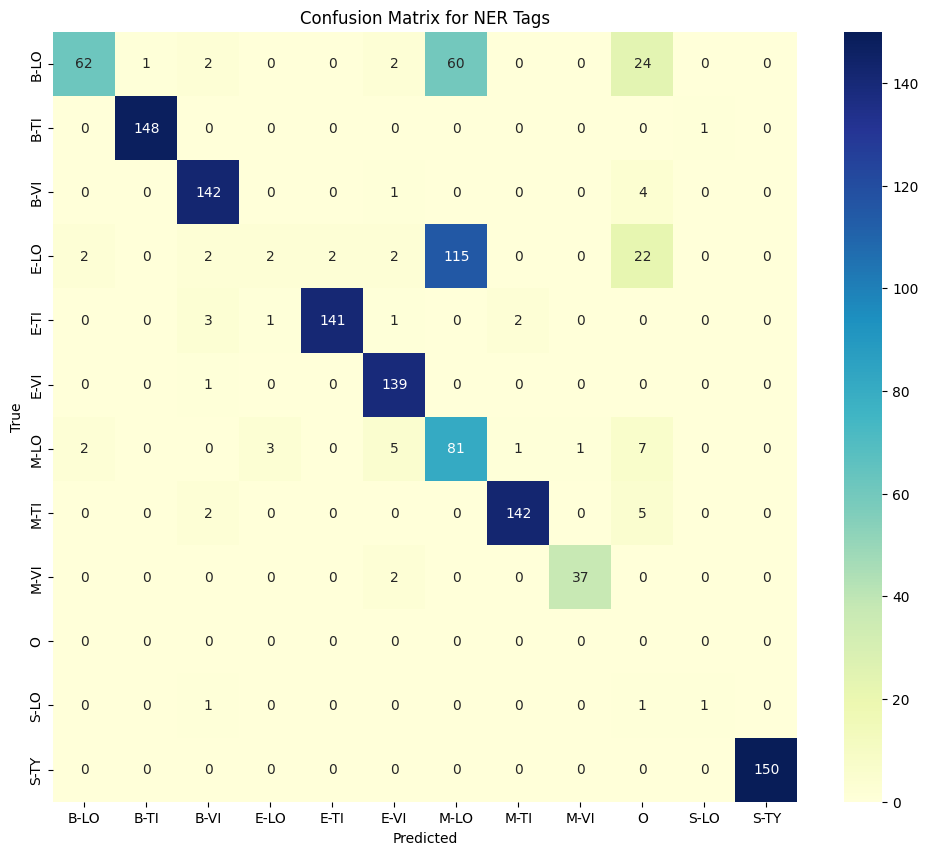

In [ ]:
# Compute confusion matrix
labels = sorted(list(set(y_true_flat + y_pred_flat)))
cm = confusion_matrix(y_true_flat, y_pred_flat, labels=labels)

# Step 4: Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap="YlGnBu")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for NER Tags")
plt.show()

In [ ]:
# Print overall metrics
print("Accuracy:", accuracy_score(y_true_flat, y_pred_flat))

Accuracy: 0.7898715041572184


In [ ]:
print("Precision (macro):", precision_score(y_true_flat, y_pred_flat, average='macro'))
print("Recall (macro):", recall_score(y_true_flat, y_pred_flat, average='macro'))
print("F1 Score (macro):", f1_score(y_true_flat, y_pred_flat, average='macro'))

Precision (macro): 0.7386674095060927
Recall (macro): 0.6978423096390086
F1 Score (macro): 0.6867280095325005


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print("Precision (micro):", precision_score(y_true_flat, y_pred_flat, average='micro'))
print("Recall (micro):", recall_score(y_true_flat, y_pred_flat, average='micro'))
print("F1 Score (micro):", f1_score(y_true_flat, y_pred_flat, average='micro'))

Precision (micro): 0.7898715041572184
Recall (micro): 0.7898715041572184
F1 Score (micro): 0.7898715041572184
